# **ACML Assignment 1 - Backpropagation**
### Jean Janssen, Florent Didascalou

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## ANN Class

In [15]:
class Ann:

    def __init__(self, layers, learning_rate):
        self.hidden_weights = np.random.random((layers[0], layers[1]))
        self.hidden_bias = np.random.random((1,layers[1]))
        self.output_weights = np.random.random((layers[1], layers[2]))
        self.output_bias = np.random.random((1,layers[2]))
        self.alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, input):
        hidden_act = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
        return self.sigmoid(np.matmul(hidden_act, self.output_weights) + self.output_bias)
    
    def backprop(self, data, epochs):
        loss_history = list() # History of Losses for each training epoch
        n = len(data) # Number of training samples
        input = data

        for epoch in range(epochs):
            cumulative_loss = 0
            
            # Calculating activations for each layer
            hidden_activation = self.sigmoid(np.matmul(input, self.hidden_weights) + self.hidden_bias)
            output_activation = self.sigmoid(np.matmul(hidden_activation, self.output_weights) + self.output_bias)

            # Calculating Loss for the epoch
            loss = output_activation - input
            cumulative_loss += np.sum(np.abs(loss)) / n

            # Calculating Deltas for both layers
            delta_out = output_activation * (1- output_activation) * loss

            delta_hidden = hidden_activation * (1- hidden_activation) * (np.matmul(delta_out, self.hidden_weights))


            # Updating the weights
            self.output_weights -= self.alpha * (1/n) * np.dot(np.transpose(hidden_activation), delta_out)
            self.hidden_weights -= self.alpha * (1/n) * np.dot(np.transpose(input), delta_hidden)

            self.output_bias -= self.alpha * (1/n) * np.sum(delta_out, axis=0)
            self.hidden_bias -= self.alpha * (1/n) * np.sum(delta_hidden, axis=0)

            
            if epoch % 5000 == 0:
                print(f"Current epoch: {epoch}, cumulative loss: {cumulative_loss}")
            loss_history.append(cumulative_loss)

        

        return loss_history


In [16]:
data = np.array([[1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1]])

learning_rate = 3
epochs = 100000
Ann_structure = [8, 3, 8]

## Model Training

In [17]:
my_network = Ann(Ann_structure, learning_rate)

loss_hist = my_network.backprop(data, epochs)

Current epoch: 0, cumulative loss: 5.761485616467441
Current epoch: 5000, cumulative loss: 0.20605245983602424
Current epoch: 10000, cumulative loss: 0.1350098323286056
Current epoch: 15000, cumulative loss: 0.10685037679531338
Current epoch: 20000, cumulative loss: 0.09096576375084628
Current epoch: 25000, cumulative loss: 0.08038661240430467
Current epoch: 30000, cumulative loss: 0.0727318895053492
Current epoch: 35000, cumulative loss: 0.06687011339897382
Current epoch: 40000, cumulative loss: 0.062196468303391775
Current epoch: 45000, cumulative loss: 0.058357400576948416
Current epoch: 50000, cumulative loss: 0.05513100976313749
Current epoch: 55000, cumulative loss: 0.052370099426557876
Current epoch: 60000, cumulative loss: 0.04997266310897148
Current epoch: 65000, cumulative loss: 0.04786547287354917
Current epoch: 70000, cumulative loss: 0.04599441238740861
Current epoch: 75000, cumulative loss: 0.04431850578829515
Current epoch: 80000, cumulative loss: 0.04280608017441422
Cur

## Results

Last epoch training loss: 0.037961110208342856
Training Set
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]
Predictions of Trained Model on Training Set:
[[0.984 0.    0.008 0.008 0.011 0.    0.    0.   ]
 [0.    0.982 0.011 0.    0.007 0.012 0.    0.   ]
 [0.    0.012 0.987 0.    0.    0.    0.    0.   ]
 [0.012 0.    0.007 0.987 0.    0.    0.    0.01 ]
 [0.013 0.01  0.    0.    0.984 0.    0.01  0.   ]
 [0.    0.011 0.    0.    0.    0.982 0.005 0.01 ]
 [0.003 0.    0.    0.    0.01  0.01  0.987 0.   ]
 [0.    0.    0.    0.008 0.    0.007 0.001 0.991]
 [0.    0.    0.    0.008 0.    0.007 0.001 0.991]]


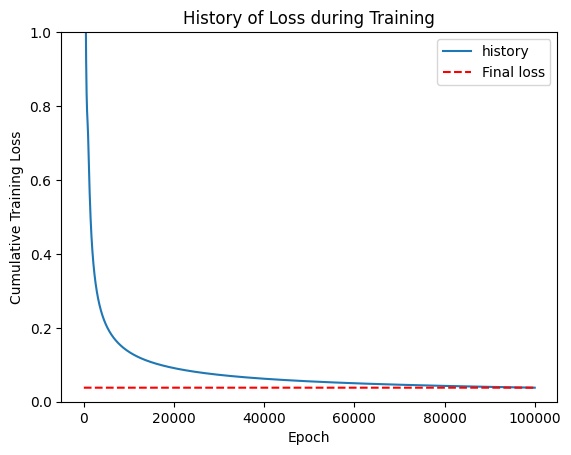

In [18]:
final_output = my_network.feedforward(data)

print(f"Last epoch training loss: {loss_hist[-1]}")

print("Training Set")
print(data)

print("Predictions of Trained Model on Training Set:")
print(np.round(final_output, 3))

plt.figure()
plt.plot(np.arange(epochs), loss_hist, label="history")
plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
plt.ylim(0,1)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cumulative Training Loss")
plt.title("History of Loss during Training")
plt.show()

## Experiments

### Experiment 1: Learning rate

Current learning rate: 5
Current epoch: 0, cumulative loss: 6.003306338358338
Current epoch: 5000, cumulative loss: 0.13365518138292284
Current epoch: 10000, cumulative loss: 0.08969833209527284
Current epoch: 15000, cumulative loss: 0.07178977534027658
Current epoch: 20000, cumulative loss: 0.06148760594185148
Current epoch: 25000, cumulative loss: 0.05460149814799817
Current epoch: 30000, cumulative loss: 0.04958864862511699
Current epoch: 35000, cumulative loss: 0.045731902983053324
Current epoch: 40000, cumulative loss: 0.04264711765945292
Current epoch: 45000, cumulative loss: 0.04010770641927211
Current epoch: 50000, cumulative loss: 0.03797030975645171
Current epoch: 55000, cumulative loss: 0.036139246025344386
Current epoch: 60000, cumulative loss: 0.034547906230219874
Current epoch: 65000, cumulative loss: 0.033148311166110896
Current epoch: 70000, cumulative loss: 0.031904912471482715
Current epoch: 75000, cumulative loss: 0.030790740069190223
Current epoch: 80000, cumulative

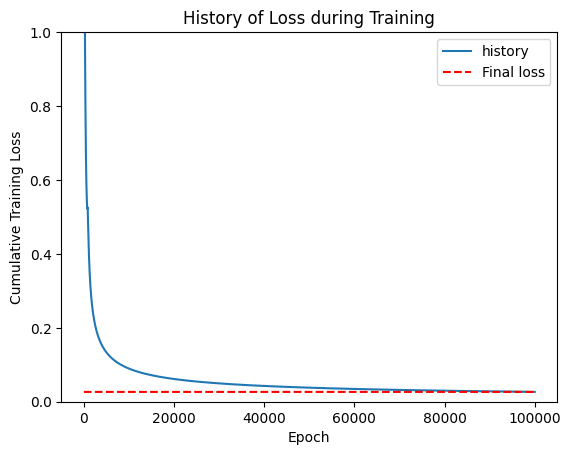

Current learning rate: 10
Current epoch: 0, cumulative loss: 6.031769339853876
Current epoch: 5000, cumulative loss: 0.08720936686114841
Current epoch: 10000, cumulative loss: 0.05967628675452
Current epoch: 15000, cumulative loss: 0.048229361695199334
Current epoch: 20000, cumulative loss: 0.04156919723725472
Current epoch: 25000, cumulative loss: 0.03707965063868595
Current epoch: 30000, cumulative loss: 0.03378985317179572
Current epoch: 35000, cumulative loss: 0.031245613508277512
Current epoch: 40000, cumulative loss: 0.029202177138462158
Current epoch: 45000, cumulative loss: 0.02751436217057061
Current epoch: 50000, cumulative loss: 0.026089839701614867
Current epoch: 55000, cumulative loss: 0.02486670121026024
Current epoch: 60000, cumulative loss: 0.023801670074726958
Current epoch: 65000, cumulative loss: 0.022863458133654122
Current epoch: 70000, cumulative loss: 0.022028806787052168
Current epoch: 75000, cumulative loss: 0.021280017578703524
Current epoch: 80000, cumulative

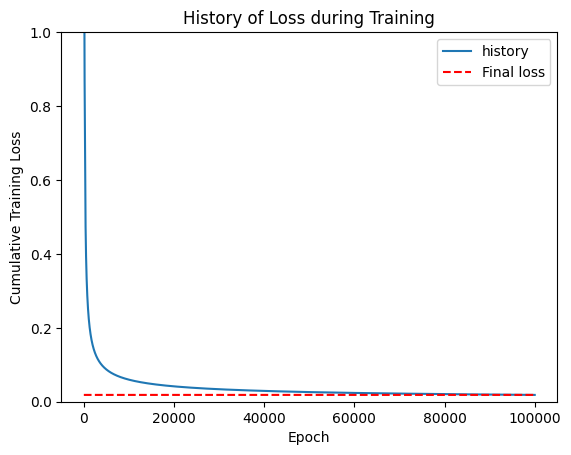

Current learning rate: 20
Current epoch: 0, cumulative loss: 5.846427755420753
Current epoch: 5000, cumulative loss: 0.059400846565862975
Current epoch: 10000, cumulative loss: 0.04144240975084724
Current epoch: 15000, cumulative loss: 0.03364719968486993
Current epoch: 20000, cumulative loss: 0.029043890324021857
Current epoch: 25000, cumulative loss: 0.025920592207362165
Current epoch: 30000, cumulative loss: 0.02362434570629541
Current epoch: 35000, cumulative loss: 0.021845067327682197
Current epoch: 40000, cumulative loss: 0.020414206308090575
Current epoch: 45000, cumulative loss: 0.01923126087724957
Current epoch: 50000, cumulative loss: 0.018232108087058045
Current epoch: 55000, cumulative loss: 0.01737366106024692
Current epoch: 60000, cumulative loss: 0.01662575741057255
Current epoch: 65000, cumulative loss: 0.015966568793590825
Current epoch: 70000, cumulative loss: 0.015379857316844936
Current epoch: 75000, cumulative loss: 0.014853260532852332
Current epoch: 80000, cumula

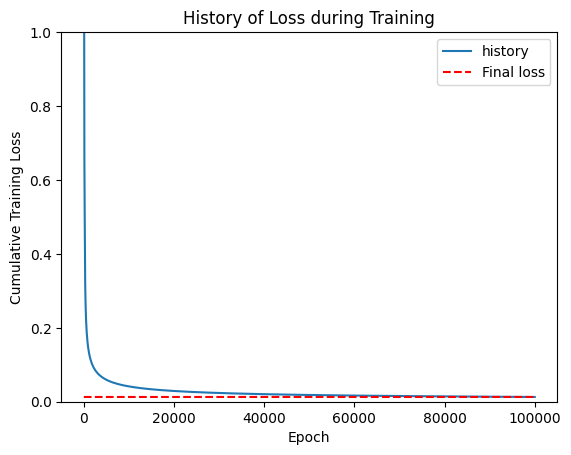

Current learning rate: 40
Current epoch: 0, cumulative loss: 5.919618806970176
Current epoch: 5000, cumulative loss: 0.042504790900806826
Current epoch: 10000, cumulative loss: 0.02939795114381374
Current epoch: 15000, cumulative loss: 0.023809071265254608
Current epoch: 20000, cumulative loss: 0.020530862529513312
Current epoch: 25000, cumulative loss: 0.018314648927955406
Current epoch: 30000, cumulative loss: 0.016688914092148368
Current epoch: 35000, cumulative loss: 0.015431070980554497
Current epoch: 40000, cumulative loss: 0.014420607250436769
Current epoch: 45000, cumulative loss: 0.013585867794004954
Current epoch: 50000, cumulative loss: 0.01288123154372103
Current epoch: 55000, cumulative loss: 0.01227609451223308
Current epoch: 60000, cumulative loss: 0.011749061284382196
Current epoch: 65000, cumulative loss: 0.01128466507624827
Current epoch: 70000, cumulative loss: 0.01087141087235207
Current epoch: 75000, cumulative loss: 0.010500553994219492
Current epoch: 80000, cumul

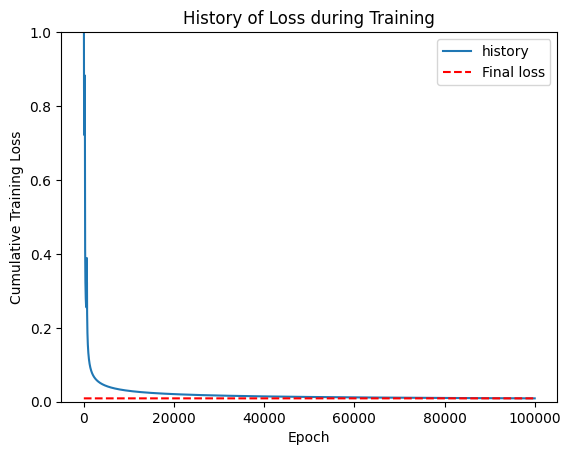

Current learning rate: 80
Current epoch: 0, cumulative loss: 5.899201574856581
Current epoch: 5000, cumulative loss: 0.8933416756031265
Current epoch: 10000, cumulative loss: 0.8908924621358109
Current epoch: 15000, cumulative loss: 0.7809154663591653
Current epoch: 20000, cumulative loss: 0.7789240799225642
Current epoch: 25000, cumulative loss: 0.7786216494528003
Current epoch: 30000, cumulative loss: 0.7785476070194224
Current epoch: 35000, cumulative loss: 0.7784943201716275
Current epoch: 40000, cumulative loss: 0.5882906225083332
Current epoch: 45000, cumulative loss: 0.5623678552908956
Current epoch: 50000, cumulative loss: 0.5612373759873432
Current epoch: 55000, cumulative loss: 0.46563617005527597
Current epoch: 60000, cumulative loss: 0.45376616870289854
Current epoch: 65000, cumulative loss: 0.45153864006188155
Current epoch: 70000, cumulative loss: 0.4507118497092123
Current epoch: 75000, cumulative loss: 0.45412443723724333
Current epoch: 80000, cumulative loss: 0.4508353

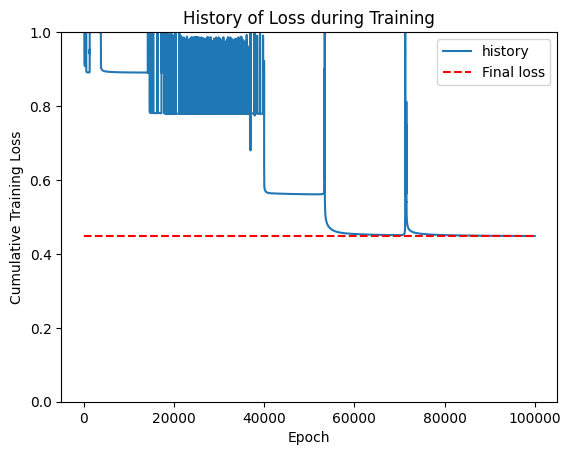

In [19]:
learning_rates = [5, 10, 20, 40, 80]

for l in learning_rates:
    print(f"Current learning rate: {l}")
    my_network = Ann(Ann_structure, l)

    loss_hist = my_network.backprop(data, epochs)

    final_output = my_network.feedforward(data)

    print(f"Last epoch training loss: {loss_hist[-1]}")

    print("Training Set")
    print(data)

    print("Predictions of Trained Model on Training Set:")
    print(np.round(final_output, 3))

    plt.figure()
    plt.plot(np.arange(epochs), loss_hist, label="history")
    plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
    plt.ylim(0,1)
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Cumulative Training Loss")
    plt.title("History of Loss during Training")
    plt.show()
    

When increasing the learning rate we can see that the final loss gets lower up until a certain turning point where we can see that that the loss function starts to oscillate. In addition the final training loss has a higher value than with a lower learning rate. Through means of experimentation with the learning rate we can see here that optimal learning rate for this neural network lies around 40.

### Experiment 2: Add multiple instances of one possible combination to dataset

Current epoch: 0, cumulative loss: 5.593228373483917
Current epoch: 5000, cumulative loss: 0.42364788755404675
Current epoch: 10000, cumulative loss: 0.4205523260704846
Current epoch: 15000, cumulative loss: 0.41951839218218506
Current epoch: 20000, cumulative loss: 0.28687057309896113
Current epoch: 25000, cumulative loss: 0.0735456023013642
Current epoch: 30000, cumulative loss: 0.028887900049803038
Current epoch: 35000, cumulative loss: 0.0217853969566802
Current epoch: 40000, cumulative loss: 0.018250602673467394
Current epoch: 45000, cumulative loss: 0.016029930321456044
Current epoch: 50000, cumulative loss: 0.014468189468123057
Current epoch: 55000, cumulative loss: 0.013292477802410982
Current epoch: 60000, cumulative loss: 0.012365944083738038
Current epoch: 65000, cumulative loss: 0.011611342372030998
Current epoch: 70000, cumulative loss: 0.010981304992701378
Current epoch: 75000, cumulative loss: 0.010444944188822152
Current epoch: 80000, cumulative loss: 0.0099811384598701

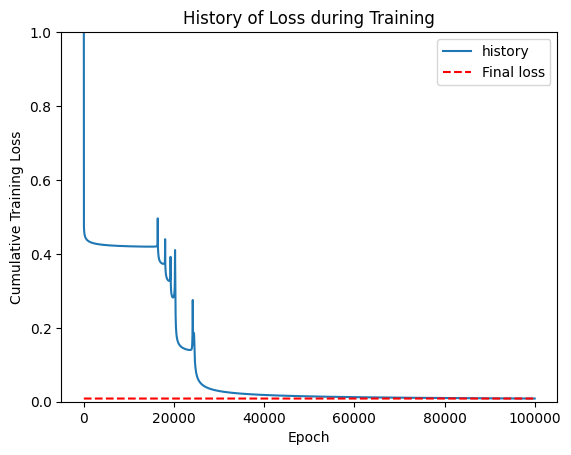

In [20]:
learning_rate = 40

data2 = np.array([[1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,1]])

my_network = Ann(Ann_structure, learning_rate)

loss_hist = my_network.backprop(data2, epochs)

final_output = my_network.feedforward(data2)

print(f"Last epoch training loss: {loss_hist[-1]}")

print("Training Set")
print(data2)

print("Predictions of Trained Model on Training Set:")
print(np.round(final_output, 3))

plt.figure()
plt.plot(np.arange(epochs), loss_hist, label="history")
plt.plot(np.arange(epochs), np.repeat(loss_hist[-1], epochs), 'r--', label="Final loss")
plt.ylim(0,1)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cumulative Training Loss")
plt.title("History of Loss during Training")
plt.show()

When adding more instances of the same learning example the neural network does not seem to be affected by this. What is interesting to note is that more oscillations occur when a specific learning example is repeated more often when comparing the results of the loss functions with this dataset with repitions when compared to the dataset without the repititions.